### Lv3 EDA 1/7 python 파이썬 EDA 기초

Let's load data using read_csv() method.

In [1]:
!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-09-10 00:40:43--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-09-10 00:40:44--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 172.217.161.206, 2404:6800:400a:813::200e
Connecting to drive.google.com (drive.google.com)|172.217.161.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m5pklmn1uf0agcc00s3qsre7q8u7jpm1/1662738000000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download&uuid=2996abad-a31e-42be-8c69-404c21dfef68 [following]
--2022-09-10 00:40:45--  https://doc-10-10-docs.googleuserc

In [2]:
# Library call
import pandas as pd

In [3]:
# Create a pandas DataFrame named 'train' using the loaded file
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Check the information, shape of the data frame
print('============ train data information ============')
print(train.info(), '\n')

# Check the shape of the data frame
print('train.shape: ', train.shape, '\n')

# Check the contents of the data frame for what it is for.
print(train.head(), '\n\n')

# Check the information, shape of the data frame
print('============ test data information ============')
print(test.info(), '\n')

# Check the shape of the data frame
print('test.shape: ', test.shape, '\n')

# Check the contents of the data frame for what it is for.
print(test.head())

============ train data information ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2

### Lv3 EDA 2/7 python 파이썬 결측치 유무 확인하기 isnull().sum()

In [4]:
# Check if there is any null value(missing value) in the train and test dataset
print(train.isnull().sum(), '\n')
print(test.isnull().sum())

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64 

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64


### Lv3 EDA 3/7 python 파이썬 수치데이터 특성보기 (describe())

When we use `describe()` method on a pandas DataFrame, the method gives us back the summary of the DataFrame.<br>

When `describe()` method turns back the summary to us, it excludes the missing values and summarizes only the numerical data.<br>

Basically, it returns the `count`, `mean`, `std`, `min`, The `1st quartile`, `2nd quartile`, `3rd quartile`, and `max` values are returned.

In [5]:
print(train.describe(), '\n')
print(test.describe())

             index      quality  fixed acidity  volatile acidity  citric acid  \
count  5497.000000  5497.000000    5497.000000       5497.000000  5497.000000   
mean   2748.000000     5.818992       7.210115          0.338163     0.318543   
std    1586.991546     0.870311       1.287579          0.163224     0.145104   
min       0.000000     3.000000       3.800000          0.080000     0.000000   
25%    1374.000000     5.000000       6.400000          0.230000     0.250000   
50%    2748.000000     6.000000       7.000000          0.290000     0.310000   
75%    4122.000000     6.000000       7.700000          0.400000     0.390000   
max    5496.000000     9.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     5497.000000  5497.000000          5497.000000           5497.000000   
mean         5.438075     0.055808            30.417682            115.566491   
std          4.756676     0

### Lv3 EDA 4/7 python 파이썬 변수 분포 시각화

We're going to visualize the variables of data using matplotlib and seaborn libraries.<br>

During the visualization process, it's typical to create a copy of the original data and then visualize the copied data.

In [6]:
# # Font installation
# # It's highly recommended doing this process on your terminal, instead of Jupyter notebook because of the password issue.
# !sudo apt-get install fonts-nanum -y
# !sudo -fv fc-cache
# !rm -rf ~/.cache/matplotlib

In [7]:
# Import libraries for visualization
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set the matplotlib library enable to print the result in Jupyter notebook
%matplotlib inline

# Set the fonts
plt.rc('font', family='NanumBarunGothic')

# Set the negarive sign to be printed out
plt.rc('axes', unicode_minus=False)

# Hide the warning sign if there is no problem in the analyzing process
import warnings
warnings.filterwarnings('ignore')

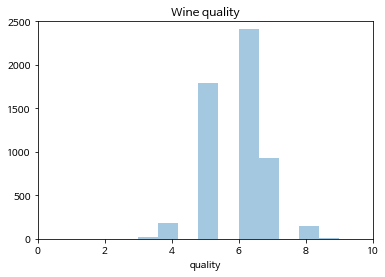

In [8]:
# Copy the loaded data
trainCopy = train.copy()

# Visualizing the wine data(the target variables: wine quality)
sns.distplot(trainCopy['quality'], kde=False, bins=10)

# [x-axis min value, x-axis max value, y-axis min value, y-axis max value]
plt.axis([0, 10, 0, 2500])

# Set the title of the graph
plt.title("Wine quality")

# Print the graph
plt.show()

### Lv3 EDA 5/7 python 파이썬 Matplotlib 선 그래프 (plot())

In [9]:
# Set the numbers to be displayed on the x-axis
x_values = [0, 1, 2, 3, 4]

# Set the numbers to be displayed on the y-axis
y_values = [0, 1, 4, 9, 16]

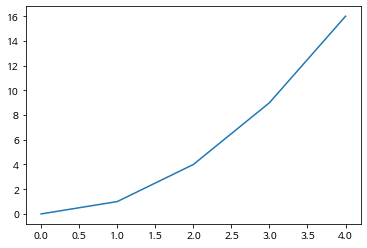

In [10]:
# Draw a line graph
plt.plot(x_values, y_values)

In [11]:
# Print the graph on the screen
plt.show()

### Lv3 EDA 6/7 python 파이썬 Matplotlib 히스토그램 그리기

In [12]:
# Create a list with a variable distribution
# This array is a simple array to draw an example histogram
a = [1,2,2,2,2,2,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,7]

(array([1., 7., 0., 3., 0., 4., 5., 0., 2., 1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

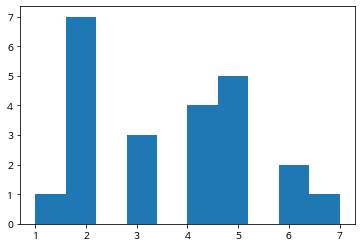

In [13]:
# Draw a graph using the hist() method
plt.hist(a)

In [14]:
# Print the graph on the screen
plt.show()